# Valorant Agent Stats in the Breeze Map

## Introduction
Welcome to the data analysis of Valorant agent statistics on the Breeze map. In this Jupyter notebook, I delve into a comprehensive exploration of agent performance in the context of one of Valorant's unique maps, Breeze. By examining key metrics such as kill-death ratio (KD), kill-death-assist ratio (KDA), win percentage, pick percentage, average score, and number of matches played, my goal is to gain valuable insights into the effectiveness of different agents on the Breeze map. This analysis offers an opportunity to understand which agents excel on this map and how their performance contributes to overall team dynamics.

## Breeze Map Overview
Breeze is a distinctive map in Valorant, known for its sprawling landscapes and open areas. With a focus on long sightlines and diverse engagement scenarios, Breeze presents a unique challenge for both attackers and defenders. Its vastness and intricate layout require agents with versatile abilities that can adapt to a wide range of situations. The map's design encourages strategic play and emphasizes the significance of agent selection, making it an intriguing arena for data analysis.

## Project Goals
In this project, my primary goals were to:

1. **Identify Top-Performing Agents**: I aimed to determine which agents achieved the highest KDA, win percentage, and average score on the Breeze map. This information can help players make informed decisions about agent selection based on their personal playstyle and strategic preferences.

2. **Analyze Role Contribution**: By examining pick percentages and win percentages, I strived to understand the impact of each agent's role on team success. This allowed for insights into how different roles synergize with the map's design.

3. **Uncover Trends Over Matches Played**: Through analysis of the number of matches played, I aimed to identify whether agent performance on Breeze improved with experience, potentially revealing learning curves and adaptation trends.

4. **Highlight Unique Agent Strengths**: By comparing KDA ratios and average scores, I intended to showcase the agents that excelled in specific aspects of the game, such as fragging or supporting, on the Breeze map.

The intersection of these goals not only offers a deep understanding of agent performance on Breeze but also contributes to broader discussions on agent balancing, strategic diversity, and map-specific nuances. The results of this analysis can be used by players, teams, and developers to optimize their strategies and enhance their gameplay experience on the Breeze map.


## Imported Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Imported Data

In [4]:
data = pd.read_csv('/kaggle/input/valorant-agent-stats-in-the-breeze-map/Valorant Agent Stats in Breeze Map - Sheet1.csv')
data

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches
0,Breach,1.00,18.2 / 18.2 / 3.7,0.183,0.030,2770,857098
1,Brimstone,0.90,15.8 / 17.5 / 3.7,0.190,0.043,2348,1212167
2,Cypher,1.01,17.5 / 17.4 / 3.6,0.204,0.033,2256,933350
3,Jett,1.00,11.4 / 11.5 / 2.5,0.350,0.082,789,2315859
4,Omen,1.00,15.6 / 15.6 / 3.3,0.240,0.041,1662,1162748
5,Phoenix,0.92,13.5 / 14.6 / 3.1,0.264,0.055,1365,1553970
6,Raze,1.02,12.6 / 12.3 / 2.7,0.324,0.059,988,1658274
7,Sage,0.91,11.6 / 12.8 / 3.1,0.307,0.068,949,1920015
8,Sova,0.92,14.2 / 15.5 / 3.4,0.241,0.051,1516,1439140
9,Viper,1.05,15.5 / 14.8 / 3.3,0.269,0.041,1414,1165959


## Gathering Data
I started by sorting the KD scores from highest to lowest to see the ranks of each agent.

In [34]:
datakd_sorted = data.sort_values(by='kd', ascending=False)
datakd_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
14,Astra,1.09,20.9 / 19.1 / 4,0.169,0.025,4238,713906,20.9,19.1,4.0
10,Reyna,1.06,11.9 / 11.2 / 2.6,0.359,0.074,805,2088811,11.9,11.2,2.6
9,Viper,1.05,15.5 / 14.8 / 3.3,0.269,0.041,1414,1165959,15.5,14.8,3.3
17,Fade,1.04,17 / 16.3 / 3.7,0.230,0.036,2089,1001440,17.0,16.3,3.7
15,Chamber,1.04,14.9 / 14.3 / 3,0.281,0.044,1326,1250558,14.9,14.3,3.0


Then, I looked into the KDA of each agent. First, I created three more columns, "kills_kda", "deaths_kda", and "assists_kda". Then I sorted the new columns by descending order.

In [6]:
data.dtypes

agent         object
kd           float64
kda           object
win_pcnt     float64
pick_pcnt    float64
avg_score      int64
matches        int64
dtype: object

In [7]:
data[['kills_kda', 'deaths_kda', 'assists_kda']] = data['kda'].str.split('/', expand=True)
data.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
0,Breach,1.00,18.2 / 18.2 / 3.7,0.183,0.030,2770,857098,18.2,18.2,3.7
1,Brimstone,0.90,15.8 / 17.5 / 3.7,0.190,0.043,2348,1212167,15.8,17.5,3.7
2,Cypher,1.01,17.5 / 17.4 / 3.6,0.204,0.033,2256,933350,17.5,17.4,3.6
3,Jett,1.00,11.4 / 11.5 / 2.5,0.350,0.082,789,2315859,11.4,11.5,2.5
4,Omen,1.00,15.6 / 15.6 / 3.3,0.240,0.041,1662,1162748,15.6,15.6,3.3


In [8]:
data['kills_kda'] = pd.to_numeric(data['kills_kda'])
data['deaths_kda'] = pd.to_numeric(data['deaths_kda'])
data['assists_kda'] = pd.to_numeric(data['assists_kda'])
data.dtypes

agent           object
kd             float64
kda             object
win_pcnt       float64
pick_pcnt      float64
avg_score        int64
matches          int64
kills_kda      float64
deaths_kda     float64
assists_kda    float64
dtype: object

In [36]:
data_killskda_sorted = data.sort_values(by='kills_kda', ascending=False)
data_killskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
14,Astra,1.09,20.9 / 19.1 / 4,0.169,0.025,4238,713906,20.9,19.1,4.0
19,Harbor,1.03,18.4 / 17.9 / 3.7,0.190,0.028,2702,776405,18.4,17.9,3.7
0,Breach,1.00,18.2 / 18.2 / 3.7,0.183,0.030,2770,857098,18.2,18.2,3.7
2,Cypher,1.01,17.5 / 17.4 / 3.6,0.204,0.033,2256,933350,17.5,17.4,3.6
11,Killjoy,1.02,17.2 / 16.8 / 3.5,0.219,0.035,2208,975999,17.2,16.8,3.5


In [38]:
data_deathskda_sorted = data.sort_values(by='deaths_kda', ascending=False)
data_deathskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
14,Astra,1.09,20.9 / 19.1 / 4,0.169,0.025,4238,713906,20.9,19.1,4.0
0,Breach,1.00,18.2 / 18.2 / 3.7,0.183,0.030,2770,857098,18.2,18.2,3.7
19,Harbor,1.03,18.4 / 17.9 / 3.7,0.190,0.028,2702,776405,18.4,17.9,3.7
1,Brimstone,0.90,15.8 / 17.5 / 3.7,0.190,0.043,2348,1212167,15.8,17.5,3.7
2,Cypher,1.01,17.5 / 17.4 / 3.6,0.204,0.033,2256,933350,17.5,17.4,3.6


In [40]:
data_assistskda_sorted = data.sort_values(by='assists_kda', ascending=False)
data_assistskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
14,Astra,1.09,20.9 / 19.1 / 4,0.169,0.025,4238,713906,20.9,19.1,4.0
0,Breach,1.00,18.2 / 18.2 / 3.7,0.183,0.030,2770,857098,18.2,18.2,3.7
1,Brimstone,0.90,15.8 / 17.5 / 3.7,0.190,0.043,2348,1212167,15.8,17.5,3.7
19,Harbor,1.03,18.4 / 17.9 / 3.7,0.190,0.028,2702,776405,18.4,17.9,3.7
18,KAY/O,1.01,16.8 / 16.7 / 3.7,0.218,0.035,2010,989153,16.8,16.7,3.7


After that, I sorted the win percent of each agent in descending order.

In [42]:
data_winpcnt_sorted = data.sort_values(by='win_pcnt', ascending=False)
data_winpcnt_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
10,Reyna,1.06,11.9 / 11.2 / 2.6,0.359,0.074,805,2088811,11.9,11.2,2.6
3,Jett,1.00,11.4 / 11.5 / 2.5,0.350,0.082,789,2315859,11.4,11.5,2.5
6,Raze,1.02,12.6 / 12.3 / 2.7,0.324,0.059,988,1658274,12.6,12.3,2.7
16,Neon,1.03,13.4 / 13 / 2.8,0.314,0.052,1101,1461168,13.4,13.0,2.8
7,Sage,0.91,11.6 / 12.8 / 3.1,0.307,0.068,949,1920015,11.6,12.8,3.1


Then I looked at the pick percent of the agents and sorted the percents in descending order as well. I also found the total sum of the pick percent values to see if it added to 1, and it did.

In [44]:
data_pickpcnt_sorted = data.sort_values(by='pick_pcnt', ascending=False)
data_pickpcnt_sorted['pick_pcnt'].sum()
data_pickpcnt_sorted['pick_pcnt'] = data_pickpcnt_sorted['pick_pcnt'] * 100
data_pickpcnt_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
3,Jett,1.00,11.4 / 11.5 / 2.5,0.350,8.2,789,2315859,11.4,11.5,2.5
10,Reyna,1.06,11.9 / 11.2 / 2.6,0.359,7.4,805,2088811,11.9,11.2,2.6
7,Sage,0.91,11.6 / 12.8 / 3.1,0.307,6.8,949,1920015,11.6,12.8,3.1
6,Raze,1.02,12.6 / 12.3 / 2.7,0.324,5.9,988,1658274,12.6,12.3,2.7
5,Phoenix,0.92,13.5 / 14.6 / 3.1,0.264,5.5,1365,1553970,13.5,14.6,3.1


I also sorted the number of matches of each agent in descending order.

In [46]:
data_matches_sorted = data.sort_values(by='matches', ascending=False)
data_matches_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
3,Jett,1.00,11.4 / 11.5 / 2.5,0.350,0.082,789,2315859,11.4,11.5,2.5
10,Reyna,1.06,11.9 / 11.2 / 2.6,0.359,0.074,805,2088811,11.9,11.2,2.6
7,Sage,0.91,11.6 / 12.8 / 3.1,0.307,0.068,949,1920015,11.6,12.8,3.1
6,Raze,1.02,12.6 / 12.3 / 2.7,0.324,0.059,988,1658274,12.6,12.3,2.7
5,Phoenix,0.92,13.5 / 14.6 / 3.1,0.264,0.055,1365,1553970,13.5,14.6,3.1


Lastly, I sorted the average score of each agent in descending order.

In [48]:
data_avgscore_sorted = data.sort_values(by='avg_score', ascending=False)
data_avgscore_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
14,Astra,1.09,20.9 / 19.1 / 4,0.169,0.025,4238,713906,20.9,19.1,4.0
0,Breach,1.00,18.2 / 18.2 / 3.7,0.183,0.030,2770,857098,18.2,18.2,3.7
19,Harbor,1.03,18.4 / 17.9 / 3.7,0.190,0.028,2702,776405,18.4,17.9,3.7
1,Brimstone,0.90,15.8 / 17.5 / 3.7,0.190,0.043,2348,1212167,15.8,17.5,3.7
2,Cypher,1.01,17.5 / 17.4 / 3.6,0.204,0.033,2256,933350,17.5,17.4,3.6


## Data Visualizations of Results
### Kill-Death Scores of the Valorant Agents in Breeze

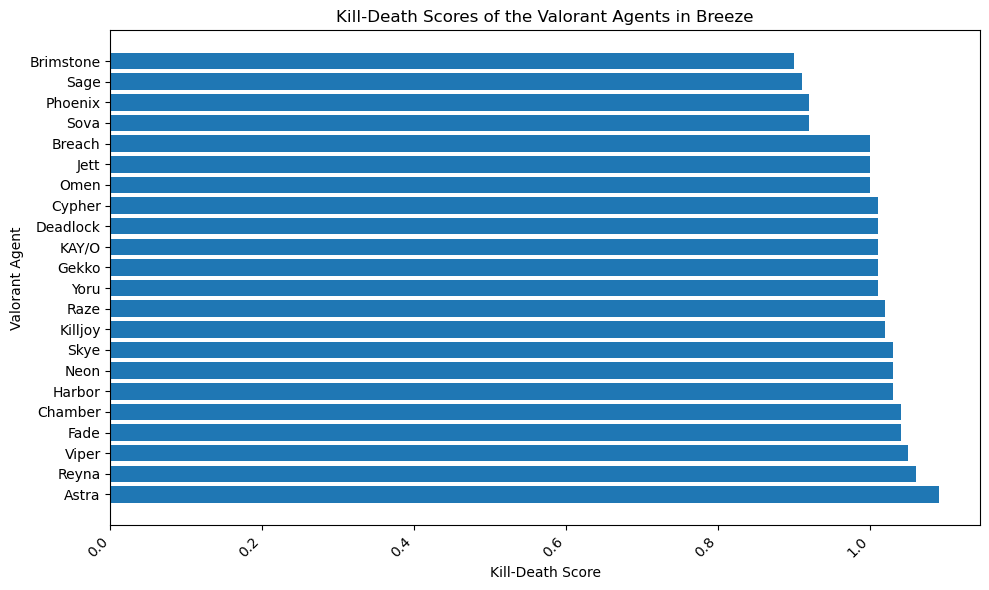

In [18]:
plt.figure(figsize=(10,6))
plt.barh(datakd_sorted['agent'], datakd_sorted['kd'])
plt.xlabel("Kill-Death Score")
plt.ylabel("Valorant Agent")
plt.title("Kill-Death Scores of the Valorant Agents in Breeze")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of Agent Kill-Death (KD) Values on Breeze Map**

In this section, I will delve into the analysis of agent Kill-Death (KD) ratios on the Breeze map. The KD ratio is a fundamental metric that provides insights into an agent's fragging capabilities, highlighting their ability to secure kills relative to their deaths. The following is an exploration of the top agents with the highest KD values and their relationship to the unique structure and characteristics of the Breeze map.

**Astra**

Astra emerges as the agent with the highest KD value of 1.09. This indicates her exceptional proficiency in securing kills while minimizing deaths. Astra's versatility plays a pivotal role on the Breeze map, where her cosmic abilities enable her to control vast spaces and disrupt enemy movement. Abilities like "Gravity Well" and "Nebula" can restrict enemy advances, complementing her fragging potential.

**Reyna**

Reyna follows closely with a KD ratio of 1.06. Her self-sustaining abilities, such as "Dismiss" and "Leer," empower her to excel in duels and secure frags, often without suffering immediate repercussions. This characteristic aligns well with the Breeze map's vast sightlines, allowing her to exploit opportunities and secure crucial eliminations.

**Viper**

Viper maintains a strong KD ratio of 1.05. Her control-based abilities like "Toxic Screen" and "Snake Bite" enable her to manipulate the battlefield, dictating engagements and denying enemy advances. The Breeze map's sprawling layout provides ample opportunities for Viper to optimize her abilities, contributing to her high KD value.

**Common Themes**

A common theme among these high-KD agents is their ability to control engagements and dictate the pace of battles. Their respective abilities enable them to disrupt enemy movements, secure frags, and minimize the risk of deaths. The Breeze map's structure, characterized by long sightlines and open spaces, aligns well with the strengths of these agents. Their capacity to exploit opportunities while avoiding vulnerabilities contributes to their elevated KD ratios.

The analysis of KD values provides valuable insights into the fragging prowess of different agents on the Breeze map. Astra, Reyna, and Viper stand out as top performers, leveraging their abilities to secure kills while navigating the map's unique challenges. Their control-oriented skills and adaptability make them formidable choices for players seeking to make a significant impact on the Breeze map's dynamic gameplay.



### Valorant Agent Kills from KDA in Breeze

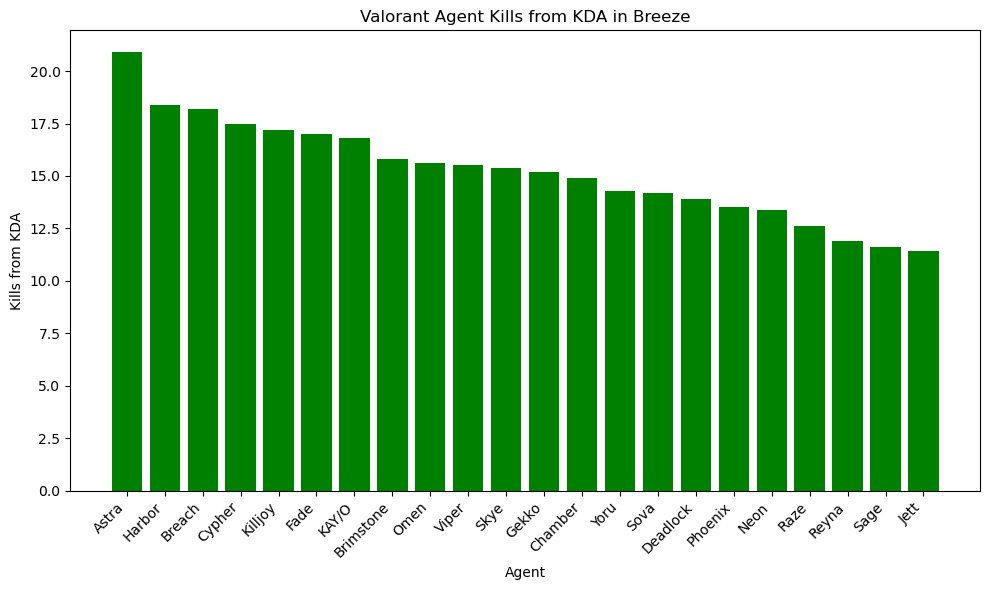

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(data_killskda_sorted['agent'], data_killskda_sorted['kills_kda'], color = 'green')
plt.xlabel('Agent')
plt.ylabel('Kills from KDA')
plt.title('Valorant Agent Kills from KDA in Breeze')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#### FINDINGS:
**Analysis of Kills per KDA by Agents on Breeze Map**

In this section, I'll provide a comprehensive analysis of the **kills per KDA** metric, focusing on the top agents with the highest values on the Breeze map. This metric reflects how effectively agents contribute to eliminations relative to their overall performance. Let's delve into the top agents and their performance, and relate these findings to the unique characteristics of the Breeze map.

**Top Agents with Highest Kills per KDA**

**Astra**

Astra excels with the highest **kills per KDA** value among agents on the Breeze map. Her ability to control space using cosmic powers is crucial in the vast and open layout of Breeze. Astra's Gravity Wells and Nova Pulses allow her to manipulate enemy movement, which contributes to higher kill counts. Her strategic abilities enhance her fragging potential.

**Harbor**

Harbor follows closely with a high **kills per KDA** value. His ability to disrupt opponents using flashes and teleports is valuable in the unpredictable engagements on Breeze. Harbor's kit allows him to catch enemies off guard, leading to more eliminations and contributing to his strong performance.

**Breach**

Breach, with a balanced **kills per KDA** value, demonstrates effective crowd control and area denial on Breeze. His abilities, such as Fault Line and Rolling Thunder, can incapacitate enemies, creating opportunities for both himself and teammates to secure kills. This fits well with Breeze's dynamic gameplay.

**Cypher**

Cypher's strategic playstyle contributes to a strong **kills per KDA** value. His surveillance tools provide valuable information about enemy positions, allowing him to make calculated decisions and secure eliminations. Cypher's ability to lock down areas aligns with Breeze's emphasis on map control.

**Killjoy**

Killjoy's tactical approach is reflected in her high **kills per KDA** value. Her gadget-based playstyle suits Breeze's unique design. Turret and Nanoswarm enable her to control important zones, forcing enemies into unfavorable engagements and enabling her to secure more kills.

**Fade**

Fade's duelist abilities contribute to his high **kills per KDA** value on Breeze. His flashes and teleports grant him an advantage in one-on-one engagements. On a map like Breeze, where quick reactions are key, Fade's kit empowers him to secure kills and dominate engagements.

**Common Themes and Abilities**

Several common themes emerge among these top-performing agents:

- **Control and Disruption**: Agents like Astra, Harbor, and Breach excel in control and disruption, utilizing abilities to manipulate enemy positions and create opportunities for eliminations.

- **Map Awareness**: Tactical agents like Cypher and Killjoy prioritize information and map control. Their abilities enable them to anticipate enemy movements, leading to effective eliminations.

- **Duelist Advantages**: Duelists such as Fade benefit from fast-paced, close-range engagements. Their flashes, teleports, and combat-focused abilities enable them to secure kills.

- **Strategic Gameplay**: Agents who offer strategic advantages, whether through utility or control, tend to perform well on Breeze. Their abilities align with the map's challenges and emphasize team coordination.

The performance of these top agents on the Breeze map is closely linked to their abilities and playstyles. Their capacity to control space, disrupt opponents, and secure eliminations align with the dynamic and strategic nature of Breeze. Understanding the synergy between agent abilities and map characteristics is essential for optimizing gameplay and achieving success on Breeze.


### Valorant Agent Deaths from KDA in Breeze

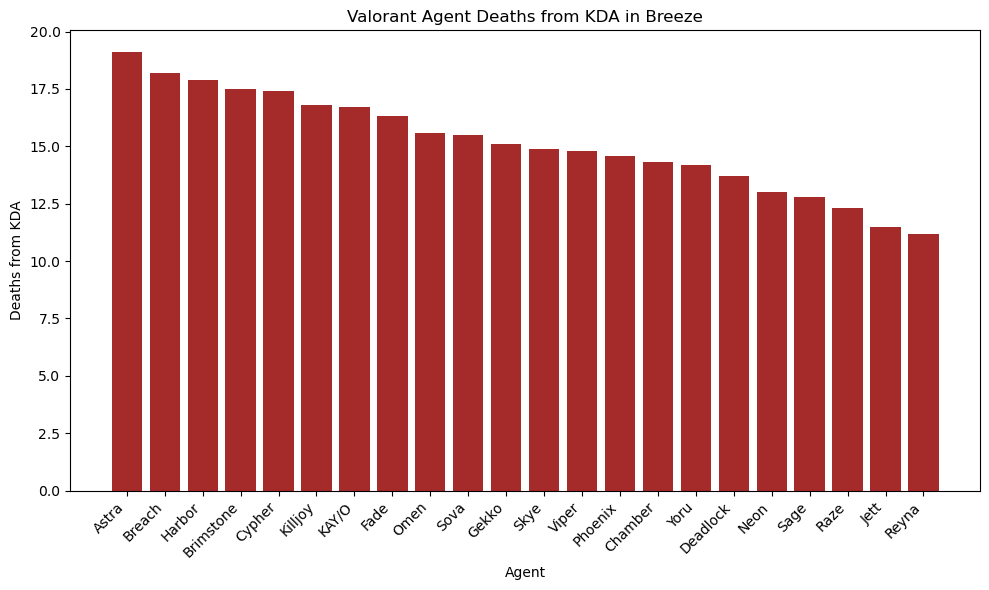

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(data_deathskda_sorted['agent'], data_deathskda_sorted['deaths_kda'], color = 'Brown')
plt.xlabel('Agent')
plt.ylabel('Deaths from KDA')
plt.title('Valorant Agent Deaths from KDA in Breeze')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of Agent Deaths-to-KDA Ratios on Breeze Map**

In this section, I will provide a thorough analysis of agent Deaths-to-KDA ratios on the Breeze map. The Deaths-to-KDA ratio evaluates an agent's ability to maintain a positive kill-to-death ratio while minimizing deaths. This analysis focuses on the top agents with the highest Deaths-to-KDA values, their relevance to the map's structure and characteristics, as well as the agent abilities that might contribute to these results.

**Astra**

Astra's presence among the top agent with the highest Deaths-to-KDA ratios might be attributed to her role as a strategic controller. Astra's focus on controlling engagements with her celestial abilities might sometimes lead her to riskier positions, potentially resulting in higher deaths. Abilities like "Nebula" and "Gravity Well" require precise placement, and her focus on area denial could lead to more confrontations and deaths.

**Breach**

Breach's higher Deaths-to-KDA ratio could be linked to his frontline initiator role. Breach's abilities, while effective at disrupting opponents, often require him to be in the forefront of engagements, making him vulnerable to enemy fire. Initiating with abilities like "Aftershock" and "Rolling Thunder" could lead to more confrontations, possibly contributing to his higher death count.

**Harbor**

Harbor's appearance among the agents with higher Deaths-to-KDA ratios could be attributed to her adaptive playstyle. While her abilities offer various forms of support, they might also necessitate her being in the heart of engagements. Abilities like "Energy Pulse" and "Surge" could put her in riskier positions, leading to increased deaths even as she contributes to the team.

**Brimstone**

Brimstone's presence on this list might be due to his role as a supportive initiator. His tactical abilities such as "Incendiary" and "Sky Smoke" are effective tools for controlling areas and supporting teammates. However, as he takes on a frontline role to set up plays, he could find himself in challenging situations, potentially leading to a higher death count.

**Cypher**

Cypher's inclusion among the top agents with higher Deaths-to-KDA ratios can be attributed to his defensive playstyle. His abilities focus on information gathering and area control, often requiring him to hold key positions. Staying in such positions might make him vulnerable to opponents seeking to eliminate him, resulting in a higher death count.

**Common Themes**

- **Tactical Engagement and Sacrifice**

Agents with higher Deaths-to-KDA ratios often share a common theme of tactical engagement and sacrifice. Astra, Breach, and Brimstone exemplify this theme through their roles as initiators and supporters. Their abilities necessitate active engagement with opponents, even at the risk of higher deaths, in order to create openings for their teams.

- **Adaptive and Supportive Playstyle**

Harbor and Cypher showcase an adaptive and supportive playstyle, often focused on area control and information gathering. Their roles require them to occupy crucial positions, even if it puts them at higher risk of dying. Their contributions through abilities, though impactful, might also lead to more confrontations.


The analysis of Deaths-to-KDA ratios reveals that agents like Astra, Breach, Harbor, Brimstone, and Cypher often take on roles that involve tactical engagement, initiation, and area control. While their higher death counts could suggest vulnerability, it's important to consider the context of their roles and the strategic sacrifices they make to contribute to their teams' successes on the Breeze map.


### Valorant Agent Assists from KDA in Breeze

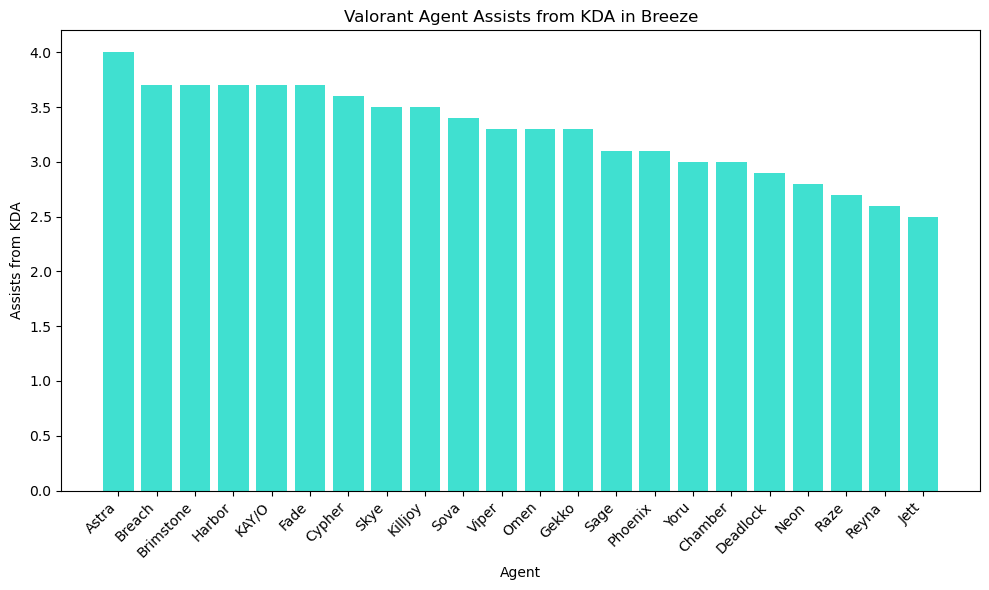

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(data_assistskda_sorted['agent'], data_assistskda_sorted['assists_kda'], color = 'turquoise')
plt.xlabel('Agent')
plt.ylabel('Assists from KDA')
plt.title('Valorant Agent Assists from KDA in Breeze')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of Agent Assists-to-KDA Ratios on Breeze Map**

In this section, I will provide a comprehensive analysis of agent Assists-to-KDA ratios on the Breeze map. The Assists-to-KDA ratio measures an agent's proficiency in supporting their team through assists while maintaining a positive kill-to-assist ratio. This analysis focuses on the top agents with the highest Assists-to-KDA values and their relevance to the map's structure and characteristics. Furthermore, we will explore the agent abilities contributing to these outcomes.

**Astra**

Astra emerges as a standout agent in the Assists-to-KDA ratio category. With her high value, Astra showcases exceptional team support, contributing to kills while maintaining her positive KDA. Her celestial abilities, such as "Nebula" and "Gravity Well," enable her to create opportunities and control engagements, making her an ideal agent to provide assists during battles.

**Breach**

Breach, known for his crowd-control abilities, ranks high in the Assists-to-KDA ratio category. His abilities like "Aftershock" and "Rolling Thunder" allow him to disrupt enemies and set up his team for successful engagements. His proficiency in supporting his teammates through assists aligns with his role as a frontline initiator who creates openings for coordinated plays.

**Brimstone**

Brimstone's presence in the top agents reinforces his well-rounded contributions. His ability to call in airstrikes and provide utility support makes him valuable in terms of both kills and assists. His tactical abilities, such as "Incendiary" and "Sky Smoke," enable him to control areas and offer strategic support, leading to favorable assists-to-KDA results.

**Harbor**

Agent Harbor's appearance in this category highlights her versatility and team-oriented playstyle. Her adaptable abilities, including "Energy Pulse" and "Surge," allow her to bolster team efforts both in terms of kills and assists. Harbor's engagement versatility contributes to a balanced Assists-to-KDA ratio, reflecting her ability to adapt to different in-game situations.

**KAY/O**

KAY/O's presence among the top agents emphasizes his role as a disruptive force and team supporter. His ability to nullify enemy abilities with "NULL/cmd" and provide his team with combat stimulants enhances his contributions to both kills and assists. KAY/O's strong team-oriented abilities contribute to his positive Assists-to-KDA ratio.

**Common Themes**

- **Tactical Team Play and Supportive Roles**

Agents with high Assists-to-KDA ratios share a common theme of tactical team play and supportive roles. Astra, Breach, and Harbor exemplify this theme by providing crucial support to their teams, utilizing their abilities to set up plays, control areas, and disrupt opponents. Their commitment to coordinated team efforts results in balanced kill-to-assist ratios.

- **Versatility and Engagement Adaptation**

The agents' adaptability stands out as another theme. Brimstone and KAY/O showcase versatility by contributing to both kills and assists through their utility-driven abilities. Their adaptability allows them to fulfill multiple roles in engagements, from initiating combat to providing valuable support, contributing to their positive Assists-to-KDA ratios.


The analysis of Assists-to-KDA ratios reveals agents who excel in tactical support and team-oriented play on the Breeze map. Astra, Breach, Brimstone, Harbor, and KAY/O all demonstrate their value through balanced contributions of kills and assists. Their abilities to initiate, control, and support highlight their essential roles in shaping engagements and securing victories for their teams.


### Win Percentages of the Valorant Agents in Breeze

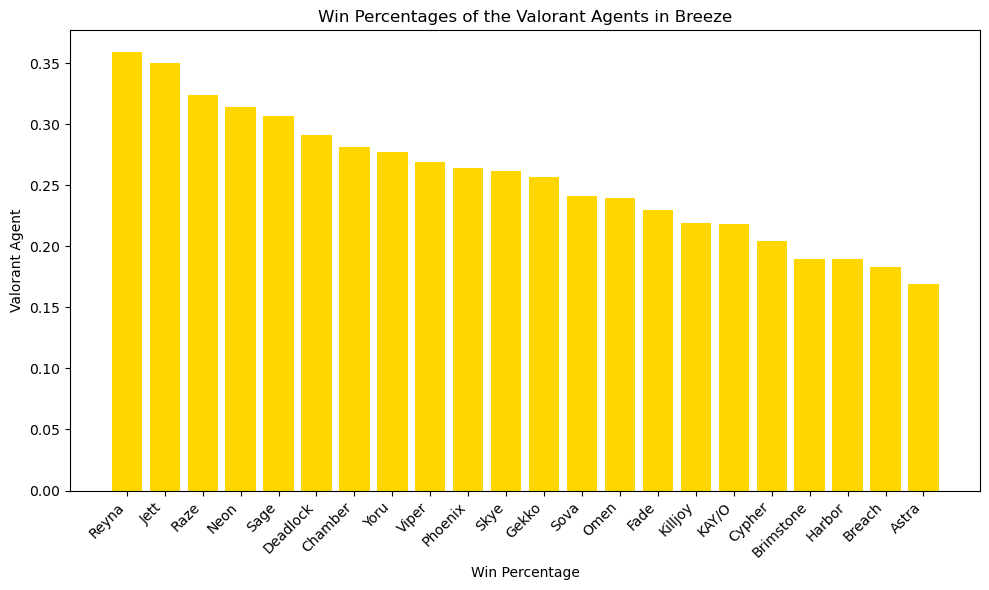

In [26]:
plt.figure(figsize=(10,6))
plt.bar(data_winpcnt_sorted['agent'], data_winpcnt_sorted['win_pcnt'], color = 'gold')
plt.xlabel("Win Percentage")
plt.ylabel("Valorant Agent")
plt.title("Win Percentages of the Valorant Agents in Breeze")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of Agent Win Percentages on Breeze Map**

In this section, I will provide a detailed analysis of the agent win percentages on the Breeze map, focusing on the top agents with the highest win percentages. The win percentage is a reflection of an agent's ability to contribute to their team's success by securing victories. I will explore the implications of these results in relation to the structure and characteristics of the Breeze map, as well as discuss the potential impact of notable agent abilities.

**Reyna**

Reyna stands out as the agent with the highest win percentage, highlighting her exceptional ability to contribute to her team's victories on the Breeze map. Reyna's aggressive playstyle and self-sufficiency allow her to excel in fragging out enemies, enabling her team to control engagements and secure key areas. Abilities such as "Dismiss" and "Empress" provide her with mobility and enhanced combat capabilities, making her a formidable force on the battlefield.

**Jett**

Jett follows closely with a notable win percentage, indicating her effectiveness in contributing to her team's success. Jett's mobility and sharpshooting abilities give her the edge in gaining map control and executing precision plays. Abilities like "Cloudburst" and "Updraft" grant her unmatched movement options, allowing her to quickly maneuver and take advantageous positions that impact the flow of the game.

**Raze**

Raze's high win percentage showcases her impact on her team's victories by leveraging her explosive and area-denial abilities. Raze's tools like "Boom Bot" and "Paint Shells" allow her to disrupt enemy positions, clear areas, and create chaos among opponents. Her ability to create strategic imbalances and control engagement zones contributes significantly to her team's triumphs.

**Neon**

Neon's presence among the top win percentages underscores the strategic value of his abilities. Neon's information-gathering and map-control skills, including "Neural Theft" and "Cyber Cage," grant his team vital insights and the ability to manipulate enemy movements. His utility-focused playstyle complements team strategies, leading to successful outcomes in matches.

**Sage**

Sage rounds out the top five with her substantial win percentage, demonstrating her capacity to influence match results through her supportive abilities. Sage's healing capabilities, barrier placement, and ultimate ability, "Resurrection," enable her to sustain her team, prevent critical losses, and reverse unfavorable situations. Her ability to keep teammates alive and control crucial areas contributes significantly to her team's overall success.

**Common Themes**

**Individual Impact and Match Control**

Among the agents with high win percentages, a recurring theme emerges — individual impact and match control. These agents possess abilities that grant them the power to shape engagements, control map dynamics, and impact opponents on a fundamental level. Their capacity to exert control over the battlefield directly translates to their team's victories.

**Versatile Playstyle and Dynamic Presence**

Agents like Jett and Raze represent this theme with their versatile playstyles and dynamic presence. Their abilities enable them to adapt to various situations, make strategic plays, and influence engagements. Their dynamic gameplay keeps opponents guessing and contributes to their team's winning strategies.

**Team Support and Tactical Adaptation**

Sage and Neon embody this theme through their supportive roles and tactical adaptations. Their abilities cater to team cohesion, sustainability, and control. Sage's healing and reviving abilities enhance her team's longevity, while Neon's information-gathering skills offer strategic insights that can shape the direction of matches.


The analysis of win percentages highlights the top agents who excel in individual impact, versatile playstyles, and team support on the Breeze map. Reyna's fragging prowess, Jett's agility and precision, Raze's explosive disruption, Neon's utility-driven gameplay, and Sage's supportive capabilities all contribute to their teams' successes. These agents effectively control engagements, adapt to changing scenarios, and influence map dynamics, ultimately securing victories through their unique contributions and strategic prowess.


### Distribution of Valorant Agent Picks in Breeze

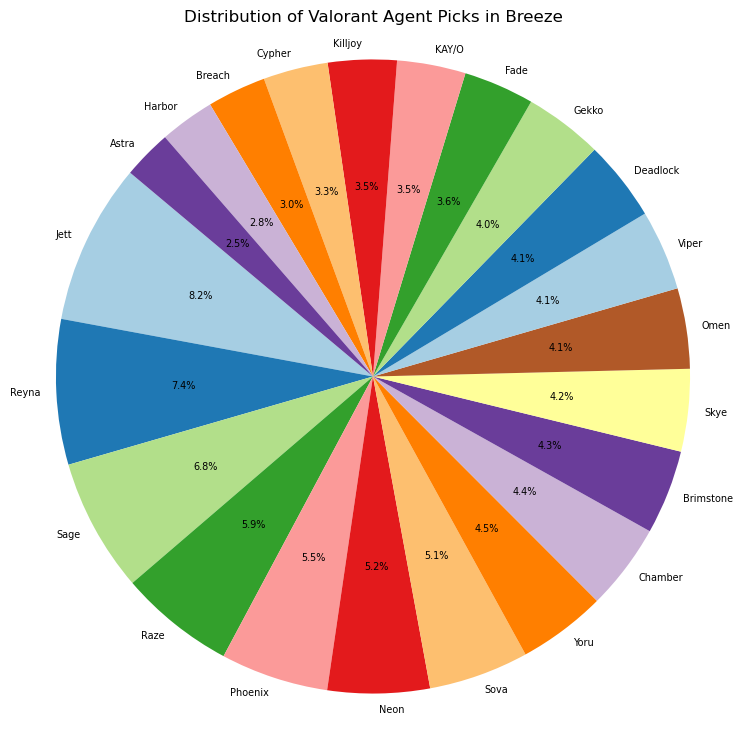

In [27]:
plt.figure(figsize=(9,9))
plt.pie(data_pickpcnt_sorted['pick_pcnt'], 
        labels=data_pickpcnt_sorted['agent'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors, 
        textprops={'fontsize': 7}, 
        labeldistance=1.05
       )
plt.title('Valorant Agent Pick Percentages')
plt.axis('equal')
plt.title("Distribution of Valorant Agent Picks in Breeze")
plt.show()

#### FINDINGS:
**Analysis of Agent Pick Percentages on Breeze Map**

In this section, I will provide an in-depth analysis of agent pick percentages on the Breeze map. The pick percentage indicates the frequency at which an agent is selected for matches on the map. This analysis will focus on the top agents with the highest pick percentages, how their characteristics align with the map's structure, and the agent abilities that could contribute to these results.

**Top Picked Agents**

The top-picked agents on the Breeze map are Jett, Reyna, Sage, Raze, and Phoenix. These agents are selected frequently due to their unique abilities and playstyles that resonate with the map's characteristics.

**Jett**

Jett's high pick percentage can be attributed to her agility and mobility, which make her an excellent choice for navigating Breeze's open spaces and verticality. Abilities like "Updraft" and "Tailwind" allow her to quickly traverse the map, granting her an advantage in taking favorable positions or evading enemies.

**Reyna**

Reyna's popularity on the Breeze map could be due to her self-sufficiency and fragging potential. Her abilities like "Dismiss" and "Leer" provide her with ways to engage or disengage effectively, making her a formidable duelist for controlling key areas and securing eliminations.

**Sage**

Sage's utility-driven abilities make her a valued pick on the Breeze map. Her healing abilities like "Healing Orb" and "Resurrection" provide sustainability for her team in longer engagements, and her "Barrier Orb" can offer cover in open spaces where positioning is crucial.

**Raze**

Raze's explosive playstyle might contribute to her high pick percentage. Her abilities such as "Boom Bot" and "Paint Shells" allow her to clear areas, disrupt opponents, and create openings, making her a versatile choice for both aggressive and defensive strategies.

**Phoenix**

Phoenix's abilities offer self-sufficiency and area control, aligning well with the challenges of the Breeze map. His "Blaze" ability creates zones of fire, providing cover or forcing opponents to reposition, while his "Curveball" can be used for scouting or blinding enemies around corners.

**Common Themes**

- **Aggressive and Self-Sufficient Playstyle**

Agents with high pick percentages often exhibit an aggressive and self-sufficient playstyle. Jett, Reyna, and Raze excel at engaging opponents and securing eliminations, often without heavy reliance on teammates. This makes them appealing choices for players who value individual impact.

- **Utility and Sustainability**

Sage's presence among the most picked agents showcases the importance of utility and sustainability. Her healing abilities and barriers can turn the tide of battles by providing the team with survivability and strategic advantages, aligning well with the map's structure.

- **Adaptability and Zone Control**

Phoenix's popularity is rooted in his adaptability and ability to control zones. His fire-based abilities can create obstacles for opponents, shape engagements, and influence map control. This adaptability makes him a well-rounded choice for players seeking to adapt to changing situations.


The analysis of agent pick percentages on the Breeze map highlights the preferences for agents with agility, self-sufficiency, utility, and zone control. Jett, Reyna, Sage, Raze, and Phoenix's frequent selection indicates their alignment with the map's unique challenges and opportunities, making them go-to choices for players seeking to excel on the Breeze map.


### Number of Matches of the Valorant Agents in

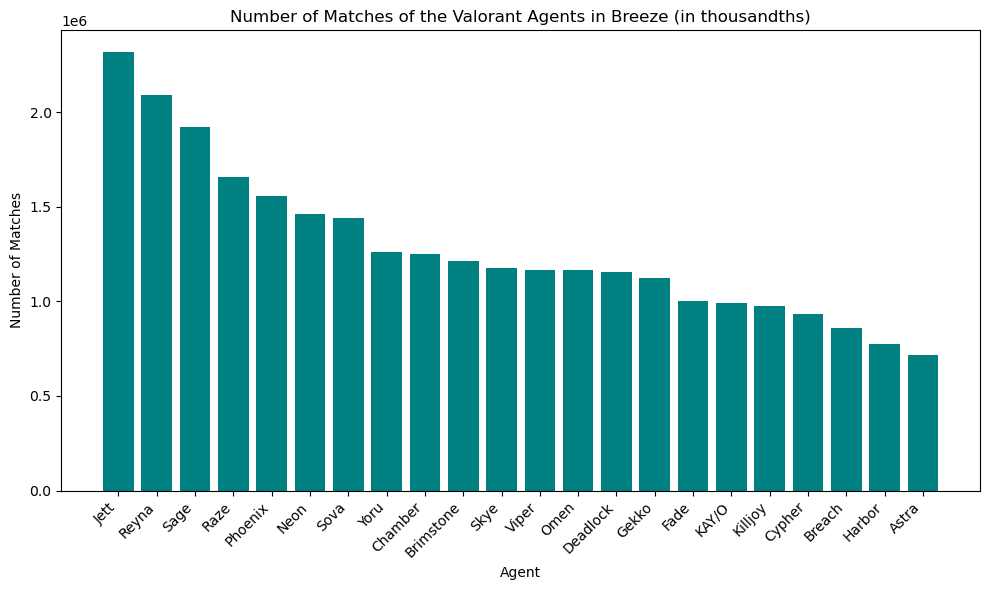

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(data_matches_sorted['agent'], data_matches_sorted['matches'], color='teal')
plt.xlabel('Agent')
plt.ylabel('Number of Matches')
plt.title('Number of Matches of the Valorant Agents in Breeze (in thousandths)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of Agent Matches Played on Breeze Map**

In this analysis, I will delve into the distribution of agent matches played on the Breeze map. By examining the top agents with the highest number of matches, we can gain insights into their popularity and their compatibility with the map's characteristics.

**Top Agents by Matches Played**

Among the agents with the highest number of matches played on the Breeze map, we observe that Jett, Reyna, Sage, Raze, and Phoenix are the most popular choices. These agents' high match counts indicate their popularity among players and their perceived effectiveness on the map.

**Jett**

Jett's frequent selection could be attributed to her agility and aggressive playstyle. Her "Updraft" and "Tailwind" abilities allow her to traverse the map quickly, which is valuable on Breeze's large open spaces. Her ultimate "Blade Storm" offers a deadly ranged option for securing eliminations.

**Reyna**

Reyna's popularity might stem from her self-sufficiency and fragging potential. Her abilities like "Dismiss" and "Leer" give her the tools to engage or disengage from fights effectively. Her "Devour" ability also allows her to heal, reducing the dependency on support agents.

**Sage**

Sage's high match count reflects her supportive role and healing capabilities. Her "Barrier Orb" and "Slow Orb" can control choke points, and her ultimate "Resurrection" can sway the outcome of rounds by reviving fallen teammates.

**Raze**

Raze's explosive and aggressive abilities could contribute to her popularity. Her "Boom Bot" and "Paint Shells" can flush out opponents from cover, making her effective at pressuring enemies and clearing spaces.

**Phoenix**

Phoenix's popularity is likely due to his self-sustaining abilities and versatility. His "Hot Hands" and "Blaze" can block sightlines and control areas, while his "Healing Orb" provides him with health regeneration.

**Common Themes**

- **Aggressive Playstyles**

Agents with high match counts often possess aggressive playstyles that capitalize on quick engagements and eliminations. Jett, Reyna, and Raze excel in this regard, leveraging their abilities to initiate fights and secure kills.

- **Self-Sufficiency and Healing**

Reyna and Phoenix's presence among the top agents highlights the appeal of self-sufficiency and healing abilities. These agents can sustain themselves during engagements, reducing the reliance on healing support from teammates.

- **Tactical Control and Support**

Sage's inclusion underscores the significance of tactical control and support roles. Her abilities can influence the flow of battles and provide crucial healing to teammates.

The analysis of agent matches played on the Breeze map reveals the popularity of agents with aggressive playstyles, self-sufficiency, and tactical control. Jett, Reyna, Sage, Raze, and Phoenix's frequent selections demonstrate their alignment with the map's dynamics and their effectiveness in various aspects of gameplay. Players' choices reflect a mix of fragging potential, healing capabilities, and tactical versatility, which contribute to successful strategies on the Breeze map.


### Valorant Agent Average Scores in Breeze

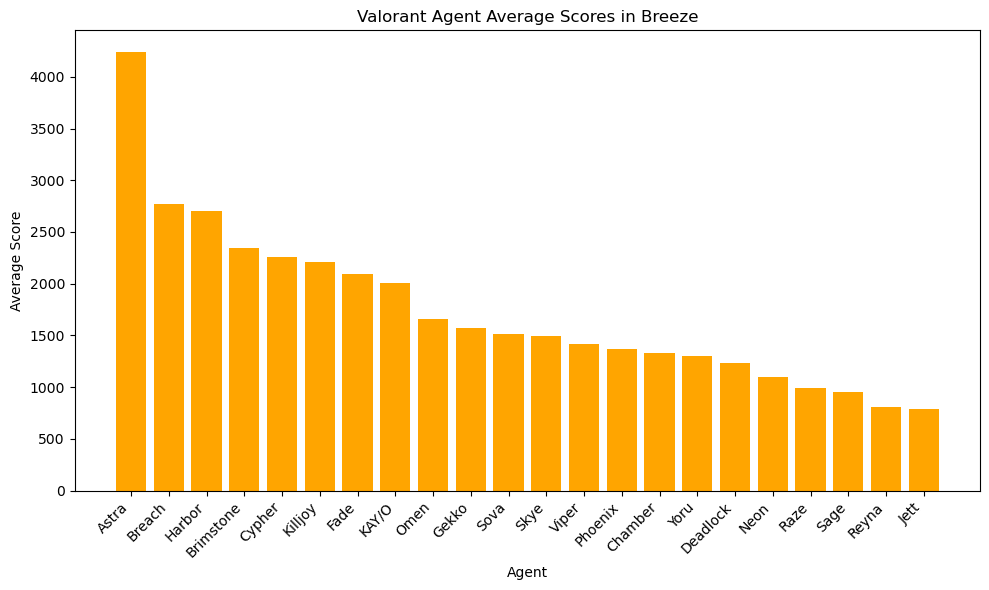

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(data_avgscore_sorted['agent'], data_avgscore_sorted['avg_score'], color='orange')
plt.xlabel('Agent')
plt.ylabel('Average Score')
plt.title('Valorant Agent Average Scores in Breeze')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of Average Score by Agent on Breeze Map**

In this analysis, we will explore the distribution of average scores achieved by various agents on the Breeze map. By focusing on the top agents with the highest average scores, we can gain insights into their impact on matches and their compatibility with the map's layout and characteristics.

**Top Agents by Average Score**

When examining the agents with the highest average scores on the Breeze map, we observe that Astra, Breach, Harbor, Brimstone, and Cypher are among the top contenders. Their exceptional average scores suggest their influence on matches and their ability to contribute significantly to their teams' success.

**Astra**

Astra's high average score could be attributed to her versatile abilities that allow her to control and manipulate areas effectively. Her "Gravity Well" and "Nebula" can stall enemies' advances, and her "Cosmic Divide" ultimate can have a game-changing impact on rounds.

**Breach**

Breach's presence among the top agents in terms of average score is likely due to his crowd-controlling abilities. His "Fault Line" and "Aftershock" can disrupt enemy formations and secure key positions, making him invaluable for engagements and retakes.

**Harbor**

Harbor's notable average score might be linked to her supportive and controlling role. Her "Scent" and "Lineup" can gather information and obstruct sightlines, enhancing her team's tactical advantage.

**Brimstone**

Brimstone's high average score reflects his role as a strategic initiator. His "Incendiary" and "Sky Smoke" can deter enemy movements and control crucial areas, while his "Orbital Strike" ultimate can force opponents to reposition.

**Cypher**

Cypher's placement among the top agents in terms of average score can be attributed to his information-gathering abilities. His "Cyber Cage" and "Spycam" can provide valuable insights into enemy movements, allowing his team to make informed decisions.

**Common Themes**

- **Tactical Control and Area Denial**

Agents like Astra, Breach, and Brimstone excel in providing tactical control and area denial. Their abilities disrupt enemy strategies and create advantageous situations for their team.

- **Information Gathering**

Cypher's inclusion underscores the significance of information gathering. His abilities enable his team to anticipate enemy movements and adjust their approach accordingly.

- **Supportive Role**

Harbor's presence highlights the importance of a supportive role. Her abilities might not directly yield eliminations, but they contribute to her team's success by gathering information and disrupting enemy lines.

The analysis of average scores achieved by agents on the Breeze map showcases the significance of tactical control, area denial, and information gathering. Astra, Breach, Harbor, Brimstone, and Cypher's strong performances indicate their ability to influence matches positively. These agents' distinct abilities, ranging from controlling enemy movement to providing crucial information, are key components in effective strategies on the Breeze map. Their contributions underscore the diverse roles agents play in shaping the outcome of matches and capitalizing on the map's unique layout and characteristics.


## Conclusion

In conclusion, the analysis of Valorant agent statistics on the Breeze map has provided valuable insights into agent performance, common themes, and recommendations for effective agent selection on this map.

**Common Themes Among Agents:**

- **Tactical Control and Area Denial:** Agents like Astra, Breach, and Brimstone excel in providing tactical control and area denial, creating advantageous situations for their team.
- **Information Gathering:** Cypher's inclusion underscores the significance of information gathering, allowing teams to make informed decisions based on enemy movements.
- **Supportive Role:** Harbor's supportive abilities gather information and disrupt enemy lines, contributing to her team's success.

**Recommended Agents for Icebox:**

Based on the data, the following agents are recommended for the Breeze map:

- **Astra:** With a high win percentage and impressive average score, Astra's versatile abilities make her a valuable asset for tactical control.
- **Breach:** His crowd-controlling abilities and respectable win rate suggest he is effective for both engagements and retakes.
- **Harbor:** As a supportive agent with a solid average score, her abilities contribute to her team's success by gathering information and obstructing sightlines.
- **Brimstone:** His strategic initiation and control abilities are well-suited for the map's layout, as indicated by his high average score.
- **Cypher:** Offering information-gathering skills, Cypher assists the team in anticipating enemy movements and adjusting their strategy accordingly.

**Mapping and Characteristics of Breeze:**

The Breeze map's open design and large areas favor agents who excel at long-range engagements, strategic control, and information gathering. The map's vast open spaces provide ample opportunities for agents like Astra, Brimstone, and Cypher to shine. Meanwhile, Breach's crowd-controlling abilities are advantageous in confined spaces, and Harbor's supportive abilities find purpose in disrupting sightlines and collecting information.

**Closing Thoughts**

The exploration of Valorant agent statistics on the Breeze map has shed light on the diverse roles agents play and their compatibility with the map's unique characteristics. As teams strive for victory, a balanced selection of agents—combining tactical control, information gathering, and supportive capabilities—can lead to success on the Breeze map. By considering agent performance data and their abilities' impact, players can make informed decisions to maximize their chances of victory in Valorant matches on the Breeze map.
